In [1]:
import numpy as np
from astropy.io import fits
import atlastools
from astropy import units as u

In [2]:
# Issue - better way to search for atlas files? Raise an error if file is not available?
atlas_files_base = 'atlasfiles/'
#file  = atlas_files_base + 'neckel.hamburg.atlas.wvscl_smooth.bintab.v2.fits'
#file  = atlas_files_base + 'stenflo.SS3.5mA.bintab.v2.fits'
#file  = atlas_files_base + 'kitt.peak.ir.1-5micron.atlas.wavelnth.bintab.fits.gz'
file  = atlas_files_base + 'kitt.peak.atlas.2mA.bintab.v2.fits.gz'
f     = fits.open(file)
exten = 1

In [3]:
# present high level view of atlas file contents (extensions, binary table columns)
print("Input file name: ", file)
print("Input extension: ", exten, "\n")
atlastools.filecontent_map(file)

Input file name:  atlasfiles/kitt.peak.atlas.2mA.bintab.v2.fits.gz
Input extension:  1 

General file information:

Object: Sun
Atlas source: Kitt Peak/FTS/Wallace 1998
Atlas acquisition site: Kitt Peak Observatory
Atlas wavelength coverage: 357.00 nm – 740.70 nm

EXTENSION 1:

Column 0 - Wavelength Scale : value range = 357.00 – 740.70 Nanometers
Column 1 - Local Intensity : value range = -1.13 – 1.02 Relint
Column 2 - Local Intensity : value range = -1.34 – 1.29 Relint
Column 3 - Telluric Spectrum : value range = -1.29 – 1.29 Relint





In [4]:
# extract all header keyword values from FITS file extension and store in a dictionary
dictionary = atlastools.make_dictionary(file,exten)

In [5]:
dictionary

{'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 2,
 'EXTEND': True,
 'OBJECT': 'Sun',
 'CMPNT_01': 'Wavelength Scale',
 'CMPNT_02': 'Intensity Atlas with Telluric Absorption',
 'CMPNT_03': 'Intensity Atlas without Telluric Absorption',
 'CMPNT_04': 'Derived Telluric Absorption',
 'CTYPE1': 'AWAV',
 'CDELT1': 0.0002,
 'CUNIT1': 'nm',
 'WAVEREF': 'air',
 'WAVEMIN': 357.001647949,
 'WAVEMAX': 740.699647949,
 'WAVEUNIT': -9,
 'ATL_SAMP': 'uniform',
 'ATLRSLTN': '350000',
 'ATL_SOUR': 'Kitt Peak/FTS/Wallace 1998',
 'ATL_MU': 1.0,
 'ATL_RAD': 0.0,
 'ATL_MISS': -1.0,
 'ATL_OBS': 'Kitt Peak Observatory',
 'ATL_LAT': 31.9583,
 'ATL_LONG': 111.595,
 'ATL_ALT': 2096.0,
 'LONGSTRN': 'OGIP 1.0',
 'ATL_ADS1': 'https://ui.adsabs.harvard.edu/abs/1998assp.book.....W',
 'COMMENT':  This FITS file may contain long string keyword values that are
  continued over multiple keywords.  This convention uses the  '&'
  character at the end of a string which is then continued
  on subsequent keywords whose name = 'CONT

In [6]:
# output values of all keywords with a certain basename
atlastools.search_key('TTYPE', dictionary)

['Wavelength Scale   1',
 'Local Intensity   1',
 'Local Intensity   2',
 'Telluric Spectrum   1']

In [7]:
# print more detailed information on the contents of each column in the binary table
atlastools.column_information(dictionary)

-----COLUMN-----

Component type: Wavelength Scale   1
Column data units: Nanometers
Axis Labels: Kitt Peak/1998 Wavelength Scale
Target: Data Scale
Derivation Method: Observation - Direct
Includes Telluric Absorption: False

-----COLUMN-----

Component type: Local Intensity   1
Column data units: Relint
Axis Labels: Kitt Peak Visible Disk Center Atlas 1998
Target: Sun
Derivation Method: Observation - Direct
Includes Telluric Absorption: True

-----COLUMN-----

Component type: Local Intensity   2
Column data units: Relint
Axis Labels: Kitt Peak Visible Disk Center Atlas 1998 - Telluric Corrected
Target: Sun
Derivation Method: Observation - Direct
Includes Telluric Absorption: False

-----COLUMN-----

Component type: Telluric Spectrum   1
Column data units: Relint
Axis Labels: Kitt Peak Visible Telluric Atlas 1998
Target: Earth Atmosphere
Derivation Method: Observation - Derived
Includes Telluric Absorption: True



In [8]:
# print which columns include telluric absorption
atlastools.telluric_info(dictionary)

Data type: Wavelength Scale   1 - Includes telluric absorption?: False

Data type: Local Intensity   1 - Includes telluric absorption?: True

Data type: Local Intensity   2 - Includes telluric absorption?: False

Data type: Telluric Spectrum   1 - Includes telluric absorption?: True



In [9]:
# load in contents of selected file
(file_data, spec_data) = atlastools.store_data(file, exten)
print("\n### atlas metadata information keys ###")
print(spec_data.keys())
print("\n### full atlas metadata information ###")
print(spec_data)
print("\n### full atlas spectral data ###")
print(file_data)



### atlas metadata information keys ###
dict_keys(['Local Intensity   1', 'Local Intensity   2', 'Telluric Spectrum   1'])

### full atlas metadata information ###
{'Local Intensity   1': <Spectrum1D(flux=<Quantity [0.06882751, 0.06899895, 0.06946772, ..., 0.98953325, 0.9893479 ,
           0.98914695]>, spectral_axis=<SpectralCoord [357.00164795, 357.00184795, 357.00204795, ...,
                740.69924795, 740.69944795, 740.69964795] nm, 
	radial_velocity=0.0 km / s, 
	redshift=0.0, 
	doppler_rest=0.0 Angstrom, 
	doppler_convention=None, 
	observer=None, 
	target=None>)>, 'Local Intensity   2': <Spectrum1D(flux=<Quantity [0.0679792 , 0.06814852, 0.06861152, ..., 0.99054056, 0.99031216,
           0.9900861 ]>, spectral_axis=<SpectralCoord [357.00164795, 357.00184795, 357.00204795, ...,
                740.69924795, 740.69944795, 740.69964795] nm, 
	radial_velocity=0.0 km / s, 
	redshift=0.0, 
	doppler_rest=0.0 Angstrom, 
	doppler_convention=None, 
	observer=None, 
	target=None>)>, 

In [10]:
# create atlas object using make_atlas, but don't populate it with full spectral data
atlas = atlastools.make_atlas(file, exten)
print(atlas.observatory.name)
print(atlas.observatory.location)
# only the metadata were loaded, not the full spectra
print(atlas.sun)

['Kitt Peak Observatory']
[(-1994164.26473224, 5037968.43602035, 3357618.61510581)] m
1


In [11]:
# create atlas object using make_atlas, but by
# setting 'loaddata', the full spectra are included in the atlas object
atlas = atlastools.make_atlas(file, exten, loaddata=1)
print(atlas.sun.meta)
print("\n#####",atlas.sun.spectral_axis)
print("\n#####")
print(atlas.atm.meta)
print(atlas.atm)
print("\n#####",(atlas.components['Local Intensity   1']).meta)

OrderedDict([('unit', ['Relint']), ('has_telluric', [True]), ('has_solar', []), ('observed_object', ['Sun']), ('observed_target', ['Quiet Sun']), ('col_title', ['KP Visible 1998 with Atmosphere']), ('col_label', ['KP Vis w/ Atm']), ('col_description', ['Kitt Peak Visible Disk Center Atlas 1998']), ('title', ['KP Visible 1998 with Atmosphere'])])

##### [357.00164795 357.00184795 357.00204795 ... 740.69924795 740.69944795
 740.69964795] nm

#####
OrderedDict([('unit', ['Relint']), ('has_telluric', [True]), ('has_solar', []), ('observed_object', ['Earth Atmosphere']), ('observed_target', ['None']), ('col_title', ['Kitt Peak Telluric 1998']), ('col_label', ['KP Vis Telluric']), ('col_description', ['Kitt Peak Visible Telluric Atlas 1998']), ('title', ['Kitt Peak Telluric 1998'])])
Spectrum1D (length=1918491)
flux:             [ 0.99742, ..., 0.99905 ],  mean=0.98447
spectral axis:    [ 357.0 nm, ..., 740.7 nm ],  mean=548.85 nm

##### OrderedDict([('unit', ['Relint']), ('has_telluric', [T

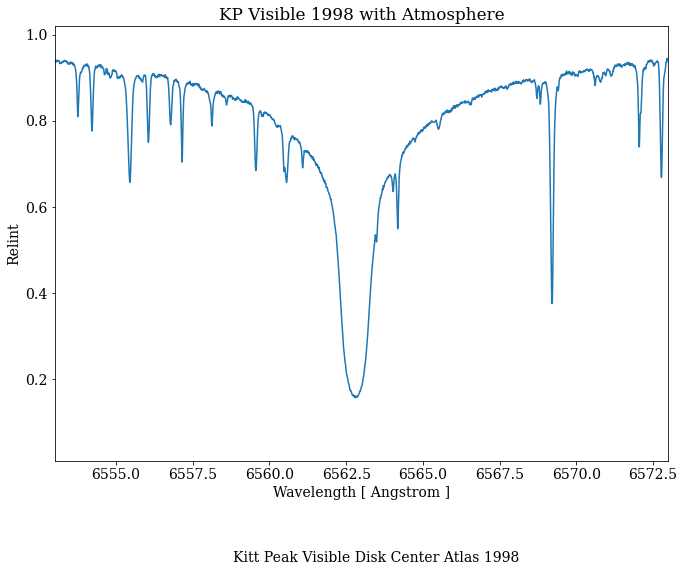

In [12]:
atlastools.atlas_spectrum_plot('Local Intensity   1', atlas, 
            startwave=6553*u.AA, endwave=657.3*u.nm, plot_unit='angstrom')